# Understanding Logistic Regression Method

It is a statistical analysis method that is often used on outcome variable that is categorical and binary. The outcome is usually a binary outcome (1 / 0, True / False, Yes / No). The outcome is the odds of it be so or happening.

In Logistic Regression, the Maximum Likelihood Estimation (MLE) method finds the model that's most likely to explain the observed data. It adjusts the model to maximize this likelihood. A higher log-likelihood value means the model fits the data better.


# EXAMPLE

This example is last execrise that we have to do for ccourse Udemy The Data Science Course by 365 Careers


The data we will be using <b>‘Bank_data_testing.csv’</b> and <b>'Bank_data.csv'</b>

## Import the relevant libraries

In [33]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#Apply a fix to the statsmodels library
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

## Load the data

Load the ‘Bank_data.csv’ dataset.

In [34]:
raw_data=pd.read_csv('Bank_data.csv')

In [35]:
data = raw_data.copy()
data['y'].unique()

array(['no', 'yes'], dtype=object)

In [36]:
#drop unnecessary data, remap text['y'] to 1 or 0

data['y']=data['y'].map({'yes': 1, 'no': 0})
data = data.drop(['Unnamed: 0'],axis = 1)
data

,interest_rate,credit,march,may,previous,duration,y
0,1.334,0.0,1.0,0.0,0.0,117.0,0
1,0.767,0.0,0.0,2.0,1.0,274.0,1
2,4.858,0.0,1.0,0.0,0.0,167.0,0
3,4.120,0.0,0.0,0.0,0.0,686.0,1
4,4.856,0.0,1.0,0.0,0.0,157.0,0
...,...,...,...,...,...,...,...
513,1.334,0.0,1.0,0.0,0.0,204.0,0
514,0.861,0.0,0.0,2.0,1.0,806.0,1
515,0.879,0.0,0.0,0.0,0.0,290.0,0
516,0.877,0.0,0.0,5.0,1.0,473.0,1


### Declare the dependent and independent variables

Use 'duration' as the independet variable.

In [37]:
y= data['y'] #dependent variables
x1 = data['duration'] #independent variables

### Simple Logistic Regression

Run the regression and graph the scatter plot.

In [38]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

# Get the regression summary
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Sat, 16 Sep 2023   Pseudo R-squ.:                  0.2121
Time:                        00:36:17   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

<h2> Thing to look out at summary </h2>

<ol>

<li>Log-Likelihood: It measures how well the model explains the data. High the value better is it. It is not always negative.</li>
<li>LL-Null (log likelihood-null): a model which has no independent variables.</li>
<li>LLR- p-value: it is measurement if our model is different from LL-null. Lower p-value better it is. If LL-Null >= Log-likelihood mean your model is useless.</li>
<li>Pseudo R-squ (Mc Fadden’s R-squared) a good val is 0.2 and 0.4 is useful for comparing variation of same model. </li>
    
</ol>

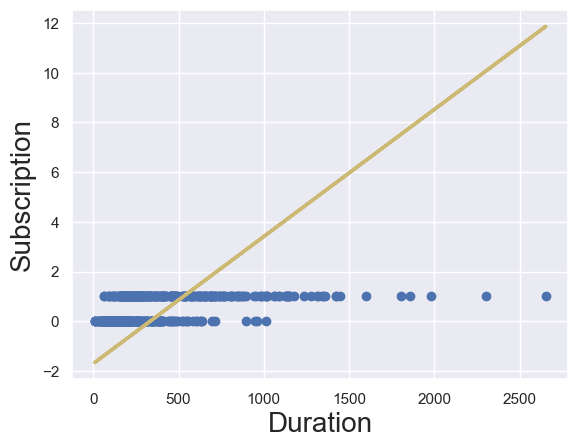

In [39]:
# Create a scatter plot of x1 (Duration, no constant) and y (Subscribed)
plt.scatter(x1,y,color='C0')

y_hat = x1*results_log.params[1]+results_log.params[0]
plt.plot(x1,y_hat,lw=2.5,color='C8')

plt.xlabel('Duration',fontsize = 20)
plt.ylabel('Subscription',fontsize = 20)
plt.show()

The logistic regression line cannot be plotted the same way as a linear regression line. In logistic regression, the relationship between the independent variable(s) and the dependent variable is nonlinear. 

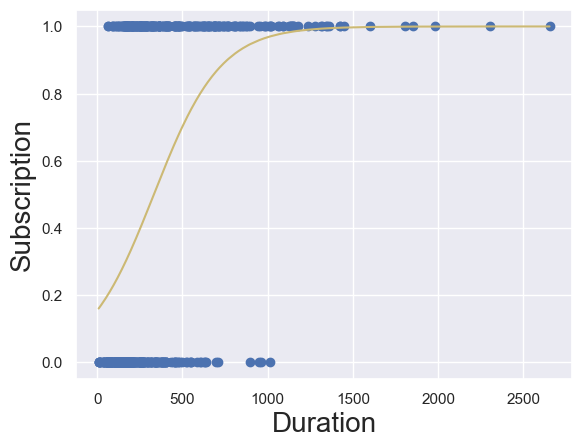

In [40]:
# Create a scatter plot of x1 (Duration, no constant) and y (Subscribed)
plt.scatter(x1,y,color='C0')

#this actually function is to undo the log.
def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1) / (1 + np.exp(b0+x*b1)))

f_sorted = np.sort(f(x1,results_log.params[0],results_log.params[1]))
x_sorted = np.sort(np.array(x1))

plt.plot(x_sorted,f_sorted,color='C8')

plt.xlabel('Duration',fontsize = 20)
plt.ylabel('Subscription',fontsize = 20)
plt.show()

## Expand the model

We can be omitting many causal factors in our simple logistic model, so we instead switch to a multivariate logistic regression model. Add the ‘interest_rate’, ‘march’, ‘credit’ and ‘previous’ estimators to our model and run the regression again. 

### Declare the independent variable(s)

In [41]:
# To avoid writing them out every time, we save the names of the estimators of our model in a list. 
estimators=['interest_rate','credit','march','previous','duration']

X1_all = data[estimators]
y = data['y']

In [42]:
X_all = sm.add_constant(X1_all)
reg_logit = sm.Logit(y,X_all)
results_logit = reg_logit.fit()

# Get the regression summary
results_logit.summary2()

Optimization terminated successfully.
         Current function value: 0.336664
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.514     
Dependent Variable: y                AIC:              360.7836  
Date:               2023-09-16 00:36 BIC:              386.2834  
No. Observations:   518              Log-Likelihood:   -174.39   
Df Model:           5                LL-Null:          -359.05   
Df Residuals:       512              LLR p-value:      1.2114e-77
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const             -0.0211   0.3113 -0.0677 0.9460 -0.6313  0.5891
interest_rate     -0.8001   0.0895 -8.9434 0.0000 -0.9755 -0.6248
credit             2.3585   1.0875  2.1688 0.0301  0.2271  4.4900
march             -1.8322   0.3297 -5.5563 0.0000 -2.4785 -1.1859
previous           1.5363   0.5010  3.0666 0.0022  0.5544  2.5182
duration           0.0070   0.0007  9.3810 0.0000  0.0055  0.0084
=================================================================

"""

### Confusion Matrix

Find the confusion matrix of the model and estimate its accuracy. 
<br><i> For convenience we have already provided you with a function that finds the confusion matrix and the model accuracy.</i>

In [43]:
def confusion_matrix(data,actual_values,model):
        
        # Confusion matrix 
        
        # Parameters
        # ----------
        # data: data frame or array
            # data is a data frame formatted in the same way as your input data (without the actual values)
            # e.g. const, var1, var2, etc. Order is very important!
        # actual_values: data frame or array
            # These are the actual values from the test_data
            # In the case of a logistic regression, it should be a single column with 0s and 1s
            
        # model: a LogitResults object
            # this is the variable where you have the fitted model 
            # e.g. results_log in this course
        # ----------
        
        #Predict the values using the Logit model
        pred_values = model.predict(data)
        # Specify the bins 
        bins=np.array([0,0.5,1])
        # Create a histogram, where if values are between 0 and 0.5 tell will be considered 0
        # if they are between 0.5 and 1, they will be considered 1
        cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
        # Calculate the accuracy
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
        # Return the confusion matrix and 
        return cm, accuracy

In [44]:
confusion_matrix(X_all,y,results_logit) 

(array([[218.,  41.],
        [ 30., 229.]]),
 0.862934362934363)

## Test the model
Load the test data from the ‘Bank_data_testing.csv’ file provided. (Remember to convert the outcome variable ‘y’ into Boolean). 
<br>(There is split data to train and test data (20%, 80%) that was taught previously)

In [45]:
#testing data
raw_testdata=pd.read_csv('Bank_data_testing.csv') 

In [46]:
#drop unnecessary data, remap text['y'] to 1 or 0

test_data = raw_testdata.copy()
test_data['y']=test_data['y'].map({'yes': 1, 'no': 0})
test_data = test_data.drop(['Unnamed: 0'],axis = 1)

### Declare the dependent and the independent variables

In [50]:
estimators=['interest_rate','credit','march','previous','duration']

y_test = test_data['y']

X1_test = test_data[estimators]
X_test = sm.add_constant(X1_test)

In [52]:
# Testing Data

confusion_matrix(X_test, y_test, results_logit)

(array([[93., 18.],
        [13., 98.]]),
 0.8603603603603603)

Determine the test confusion matrix and the test accuracy and compare them with the train confusion matrix and the train accuracy.

In [53]:
# Training data

confusion_matrix(X_all,y,results_logit)

(array([[218.,  41.],
        [ 30., 229.]]),
 0.862934362934363)

Test accuracy is 86.04% compared to 86.29% for train accuracy. 

The difference within 1-5% between training and testing accuracy is often considered acceptable It suggests that the model is neither overfitting nor underfitting.

If the test results is to reutrn low test accuracy but high train accuracy. It will mean the model is overfitted.